/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:37: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in double_scalars


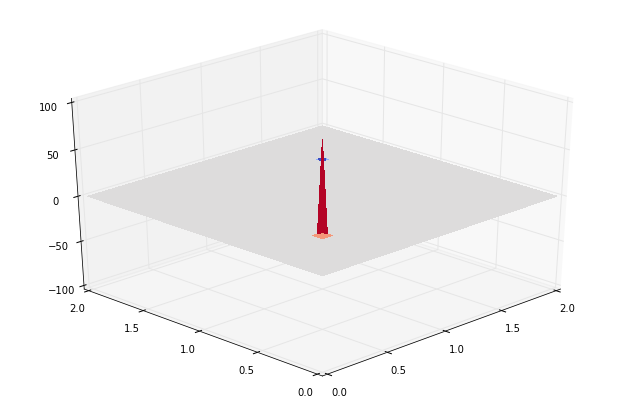

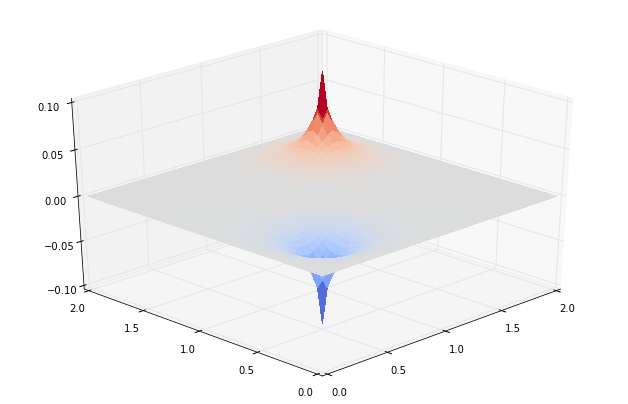

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

def plot2D(X, Y, p):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    surf1 = ax.plot_surface(X, Y, p, rstride=1, cstride=1,
        cmap=cm.coolwarm, antialiased=False, linewidth=0)
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    ax.view_init(30,225)

def poisson2d(p, b, dx, dy, nt):
    l1norm = 1
    for it in range(nt):
        pn = p.copy()
        p[1:-1, 1:-1] = (dy**2*(pn[1:-1, 2:] + pn[1:-1, :-2])+\
                         dx**2*(pn[2:,1:-1] + pn[0:-2, 1:-1])-\
                         (dx*dy)**2*b[1:-1, 1:-1])/\
                         (2*(dx**2+dy**2))
        p[:,0] = 0
        p[:,-1] = 0
        p[0,:] = 0
        p[-1,:] = 0
        l1norm = np.sum(np.abs(p)-np.abs(pn))/np.sum(np.abs(pn))
    return p
   
    
def run(Nx, Ny, nt):
    x, dx = np.linspace(0,2,Nx, retstep=True)
    y, dy = np.linspace(0,2,Ny, retstep=True)
    X, Y = np.meshgrid(x,y)
    p = np.zeros_like(X)
    b = np.zeros_like(X)
    
    b[Ny/4,Nx/4]  = 100
    b[3*Ny/4,3*Nx/4] = -100
    
    plot2D(X,Y,b)
    p[:, 0] = 0
    p[:,-1] = 0
    p[0, :] = 0
    p[-1,:] = 0
    
    plot2D(X, Y, poisson2d(p, b, dx, dy, nt))
    
# for i in range(0,10):
run(50, 50, 100)